### **Atividade Prática 3 do Curso: Statistics for Data Science and Business Analysis (Udemy)**

**Conteúdos abordados nessa seção:**<br>
    - Teste de hipótese: Amostras independentes;
    - T-Teste, variância da população desconhecida.

Gender pay gap: Test whether a particular company is discriminating against employees on the basis of gender and ethnicity.

* **Importando as bibliotecas**

In [1]:
# Bibliotecas básicas
import numpy as np
import pandas as pd

# Bibliotecas de Visualização
import seaborn as sns
import matplotlib.pyplot as plt

## Configurações de Visualização
%matplotlib inline
sns.set_style('darkgrid')
sns.set_context('paper', font_scale = 1.3)

* **Importando o dataset**

In [2]:
path = 'datasets/4.10.example_exercise.xlsx'
df = pd.read_excel(path)

df.head()

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary
0,Sweetwater,Alex,51,Male,United States,White,2011-08-15,Software Engineering,Software Engineering Manager,56160.0
1,Carabbio,Judith,30,Female,United States,White,2013-11-11,Software Engineering,Software Engineer,116480.0
2,Saada,Adell,31,Female,United States,White,2012-11-05,Software Engineering,Software Engineer,102440.0
3,Szabo,Andrew,34,Male,United States,White,2014-07-07,Software Engineering,Software Engineer,99840.0
4,Andreola,Colby,38,Female,United States,White,2014-11-10,Software Engineering,Software Engineer,99008.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Surname     174 non-null    object        
 1   Name        174 non-null    object        
 2   Age         174 non-null    int64         
 3   Gender      174 non-null    object        
 4   Country     174 non-null    object        
 5   Ethnicity   174 non-null    object        
 6   Start_date  174 non-null    datetime64[ns]
 7   Department  174 non-null    object        
 8   Position    174 non-null    object        
 9   Salary      174 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 13.7+ KB


In [4]:
# Missing values
df.isna().sum()

Surname       0
Name          0
Age           0
Gender        0
Country       0
Ethnicity     0
Start_date    0
Department    0
Position      0
Salary        0
dtype: int64

In [5]:
# Descriptive statistics
df.describe(include=[object]).T

,count,unique,top,freq
Surname,174,169,Smith,3
Name,174,154,Michael,3
Gender,174,2,Female,98
Country,174,6,United States,166
Ethnicity,174,5,White,112
Department,174,7,Production,106
Position,174,23,Production Technician I,73


In [6]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,174.0,37.793103,8.384734,25.0,31.0,36.0,43.0,67.0
Salary,174.0,68603.779310,34121.543021,29120.0,41600.0,52000.0,110240.0,166400.0


* **EDA**

In [7]:
# We will split the ethnicity between white and others ethnicities.
df['Ethnicity_val'] = df['Ethnicity'].map(lambda x: 'White' if x == 'White' else 'Other_Ethnicity')

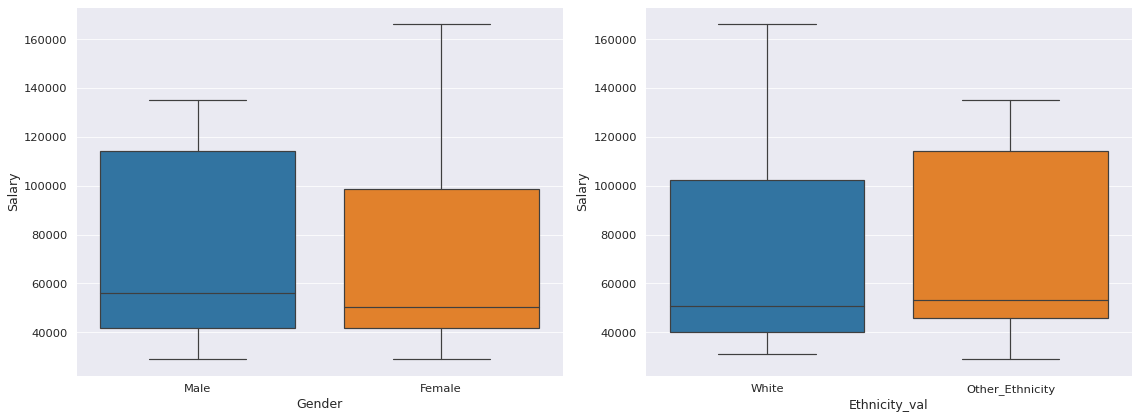

In [8]:
# See the salary distribution by gender
fig, ax = plt.subplots(1,2, figsize = (16,6))
sns.boxplot(data = df, x = 'Gender', y = 'Salary', ax = ax[0])
sns.boxplot(data = df, x = 'Ethnicity_val', y = 'Salary', ax = ax[1])

plt.tight_layout()

In [9]:
# Looking for the boxplot graphs we can see a probabily outlier in the salary vaiable. We need to check to avoid misinterpretations.
df.query('Salary > 140000')

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary,Ethnicity_val
106,Bold,Caroline,63,Female,United States,White,2012-07-02,Executive Office,President & CEO,166400.0,White


In [10]:
# Let's remove the value because it is the presidency position, because there is no other similar position for comparisons
df_filtered = df.query('Salary <= 140000')

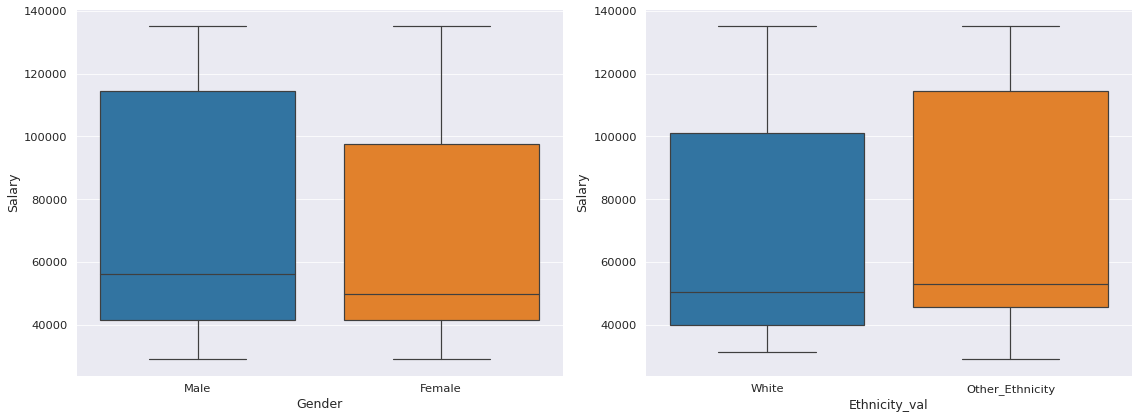

In [11]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
sns.boxplot(data = df_filtered, x = 'Gender', y = 'Salary', ax = ax[0])
sns.boxplot(data = df_filtered, x = 'Ethnicity_val', y = 'Salary', ax = ax[1])

plt.tight_layout()

- **1. We will test 2 hypothesis for 4 Age groups: <= 30, > 30 and <= 40, > 40 and <=50, and > 50.**

    - Hypothesis 1: The mean Man Salary is bigger than Female Salary:

                 - H0: The mean Salary between Man and Female are equal i.e., μ1 = μ2
                 - H1: The mean Salary between Man and Female are different i.e., μ1 != μ2
                 
    - Hypothesis 2: The mean White Ethnicity Salary is bigger than Others Ethnicity Salary.
    
                 - H0: The mean Salary between Ethnicitys are equal i.e., μ1 = μ2
                 - H1: The mean Salary between Ethnicitys are different i.e., μ1 != μ2

In [12]:
# Function to calculate the T-Statistic for independent samples
from scipy import stats

def T_test(data1, data2, alpha = 0.05):
    t_value,p_value=stats.ttest_ind(data1, data2)
    
    print('Test statistic is %f'%float("{:.6f}".format(t_value)))

    print('p-value for two tailed test is %f'%p_value)

    alpha = alpha

    if p_value <= alpha:

        print('We reject the null hypothesis H0.')
    else:
        print('We do not reject the null hypothesis H0.')

In [13]:
# First: Salary between Genders and Ages
data_test = df_filtered.query('Age <= 30')

T_test(data_test[data_test['Gender'] == 'Male']['Salary'],
                                data_test[data_test['Gender'] == 'Female']['Salary'])


data_test = df_filtered.query('Age > 30 & Age <= 40')

T_test(data_test[data_test['Gender'] == 'Male']['Salary'],
                                data_test[data_test['Gender'] == 'Female']['Salary'])

data_test = df_filtered.query('Age > 10 & Age <= 50')

T_test(data_test[data_test['Gender'] == 'Male']['Salary'],
                                data_test[data_test['Gender'] == 'Female']['Salary'])

data_test = df_filtered.query('Age > 50')

T_test(data_test[data_test['Gender'] == 'Male']['Salary'],
                                data_test[data_test['Gender'] == 'Female']['Salary'])

Test statistic is 0.578376
p-value for two tailed test is 0.566822
We do not reject the null hypothesis H0.
Test statistic is 0.062945
p-value for two tailed test is 0.949962
We do not reject the null hypothesis H0.
Test statistic is 1.436062
p-value for two tailed test is 0.152974
We do not reject the null hypothesis H0.
Test statistic is 0.398366
p-value for two tailed test is 0.697357
We do not reject the null hypothesis H0.


In [14]:
# Second: Salary between Ethnicitys and Ages
data_test = df_filtered.query('Age <= 30')

T_test(data_test[data_test['Ethnicity'] == 'White']['Salary'],
                                data_test[data_test['Ethnicity'] != 'White']['Salary'])


data_test = df_filtered.query('Age > 30 & Age <= 40')

T_test(data_test[data_test['Ethnicity'] == 'White']['Salary'],
                                data_test[data_test['Ethnicity'] != 'White']['Salary'])

data_test = df_filtered.query('Age > 10 & Age <= 50')

T_test(data_test[data_test['Ethnicity'] == 'White']['Salary'],
                                data_test[data_test['Ethnicity'] != 'White']['Salary'])

data_test = df_filtered.query('Age > 50')

T_test(data_test[data_test['Ethnicity'] == 'White']['Salary'],
                                data_test[data_test['Ethnicity'] != 'White']['Salary'])

Test statistic is -1.267992
p-value for two tailed test is 0.213415
We do not reject the null hypothesis H0.
Test statistic is -0.515027
p-value for two tailed test is 0.607903
We do not reject the null hypothesis H0.
Test statistic is -0.700099
p-value for two tailed test is 0.484902
We do not reject the null hypothesis H0.
Test statistic is -0.880328
p-value for two tailed test is 0.395970
We do not reject the null hypothesis H0.


- **Discussion: For all cases we had a high p-value, so we cannot reject the null hypothesis with a high degree of significance for all cases analyzed. Which means that the analyzed company presents close average values ​​for both genders and ethnicities.**

- **2. We will test 2 hypothesis for each Department:**

    - Hypothesis 1: The mean Man Salary is bigger than Female Salary for each Department:

                 - H0: The mean Salary between Man and Female are equal i.e., μ1 = μ2
                 - H1: The mean Salary between Man and Female are different i.e., μ1 != μ2
                 
    - Hypothesis 2: The mean White Ethnicity Salary is bigger than Others Ethnicity Salary for each Department.
    
                 - H0: The mean Salary between Ethnicitys are equal i.e., μ1 = μ2
                 - H1: The mean Salary between Ethnicitys are different i.e., μ1 != μ2

In [29]:
# Some departments have empty spaces around the strings values
df_filtered['Department'] = df_filtered['Department'].map(lambda x: x.strip());

/tmp/ipykernel_38360/3970188309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Department'] = df_filtered['Department'].map(lambda x: x.strip());


In [32]:
departament_list = df_filtered['Department'].unique().tolist()

for departament in departament_list:

    print(f'For {departament}:')
    
    data_test = df_filtered[df_filtered['Department'] == departament]

    T_test(data_test[data_test['Gender'] == 'Male']['Salary'],
                                data_test[data_test['Gender'] == 'Female']['Salary'])

For Software Engineering:
Test statistic is -2.422922
p-value for two tailed test is 0.059901
We do not reject the null hypothesis H0.
For Sales:
Test statistic is 0.026271
p-value for two tailed test is 0.979259
We do not reject the null hypothesis H0.
For Production:
Test statistic is 0.363464
p-value for two tailed test is 0.716996
We do not reject the null hypothesis H0.
For IT/IS:
Test statistic is 1.942168
p-value for two tailed test is 0.063942
We do not reject the null hypothesis H0.
For Admin Offices:
Test statistic is 0.965657
p-value for two tailed test is 0.371508
We do not reject the null hypothesis H0.


- **Discussion: For all Departments we had a high p-value, so we cannot reject the null hypothesis with a high degree of significance for all cases analyzed. Which means that the analyzed company presents close average values ​​for both genders and ethnicities in all departments.**

- **3. We will test 2 hypothesis for the 50 oldest employees:**

    - Hypothesis 1: The mean Man Salary is bigger than Female Salary:

                 - H0: The mean Salary between Man and Female are equal i.e., μ1 = μ2
                 - H1: The mean Salary between Man and Female are different i.e., μ1 != μ2
                 
    - Hypothesis 2: The mean White Ethnicity Salary is bigger than Others Ethnicity Salary.
    
                 - H0: The mean Salary between Ethnicitys are equal i.e., μ1 = μ2
                 - H1: The mean Salary between Ethnicitys are different i.e., μ1 != μ2

In [33]:
olders_50 = df_filtered.sort_values(by= 'Start_date').head(50)

print('By Gender:')
T_test(olders_50[olders_50['Gender'] == 'Male']['Salary'],
                                olders_50[olders_50['Gender'] == 'Female']['Salary'])

print('By Ethnicity:')
T_test(olders_50[olders_50['Ethnicity'] == 'White']['Salary'],
                                olders_50[olders_50['Ethnicity'] != 'White']['Salary'])

By Gender:
Test statistic is 0.751977
p-value for two tailed test is 0.455736
We do not reject the null hypothesis H0.
By Ethnicity:
Test statistic is -1.303532
p-value for two tailed test is 0.198611
We do not reject the null hypothesis H0.


- **Discussion: For the 50 oldest employees we had a high p-value, so we cannot reject the null hypothesis with a high degree of significance for all cases analyzed. Which means that the analyzed company presents close average values ​​for both genders and ethnicities in the 50 oldest employees.**